<center> <h1> Lecture 7: Sequence Models: Transformers </h1> </center>
<center> Jillian Fisher, Zaid Harchaoui </center>
    <center> Data 598 (Winter 2023), University of Washington </center>

In this lecture, we will talk about models which deal with sequential data. In particular, we talk about transformer models.

The example in this notebook is based on [this PyTorch tutorial](https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html) and the [D2L book](https://d2l.ai/), https://machinelearningmastery.com/the-transformer-model/, and adpated from notes by Krishna Pillutla.

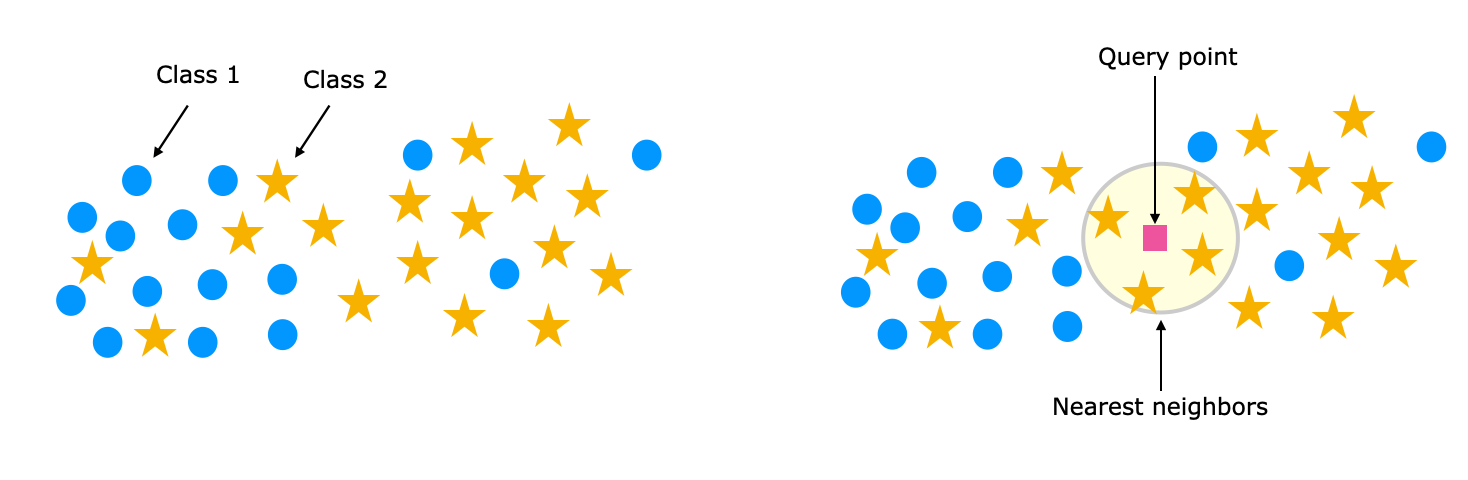

# Part 1: The Transformer Architecture

The transformer architecture puts together self-attention layers with fully connected (MLP) layers together with normalization. 


<div>
<img src="https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1-727x1024.png" width="250"/>
</div>
Photo Credit: https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1-727x1024.png

A transformer block contains the following components: 
- self-attention, which we discussed, 
- layer normalization (LayerNorm), a form of normalization similar to BatchNorm, 
- a multi-layer perceptron (MLP), 
- residual connections of the form $h_{i+1} = h_i + \text{layer}(h_i)$, denoted in the figure above by $\oplus$. 

Recall that we needed a large batch size (>= 64) for BatchNorm. LayerNorm avoids this issue by applying the same normalization over the various dimension of a single example (e.g., applying normalization a rows of a matrix while BatchNorm applies normalization over columns). 
For further details, we refer to the [D2L Book](https://d2l.ai/chapter_attention-mechanisms-and-transformers/transformer.html). 


### Encoder
<div>
<img src="https://machinelearningmastery.com/wp-content/uploads/2021/10/transformer_1-727x1024.png" width="250"/>
</div>
Photo Credit: https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1-727x1024.png

Flow through the Encoder:
1. Inputs are embedded into word vectors

2. Position encoding is connected using residual connection. 


>>**Positional Encoding**: 
Note that the attention mechanism does not take into account any ordering (sequential or otherwise) -- compare with the example on nearest neighbors. This is because it does not make use of recurrence (information going backwards). 
To endow the model with sequential information, we will augment with word embeddings with positional information. 
<div>
<img src="https://jalammar.github.io/images/gpt2/gpt2-positional-encoding.png" width="350"/>
</div>
Photo Credit: https://jalammar.github.io/illustrated-gpt2/#part-1-got-and-language-modeling


3. First Sub-layer

    a. Multi-head self-attention is applied. It is called Multi-head because it is multiple self-attention layers in parallel.

    b. Combine the multi-heads and normalize the layer
    
>>**Self-Attention**:
As we learned, attention allows the model to understand which parts of an input are important to attune when making decisions about the output. However, this layer is called "self-attention" because the input and output to the layer are within the Encoder (both focused on the output). Therefore, the information that is computed helps the model "relate different positions of a single sequence in order to compute a representation of the sequence" (Attention Is All You Need, 2017). 

4. Second Sub-layer
    
    a. Fully connected feed-forward (like MLP) which generally has two linear transformations (like ReLU) activation between them. 

    b. Combine the multi-heads and normalize the layer


### Decoder
<div>
<img src="https://machinelearningmastery.com/wp-content/uploads/2021/10/transformer_2-727x1024.png" width="250"/>
</div>
Photo Credit: https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1-727x1024.png

Flow through the Decoder:
1. Receives previous output of the decoder as the input (with the positional information)

2. First Sub-layer

    a. *Masked* Multi-head self-attention is applied.  

    b. Combine the multi-heads and normalize the layer
    
>>**Masked Attention**:
The decoder job is to predict the next token, based only on the predictions it has made so far. Therefore, unlike the encoder, the decoder attention layers are modified to attend only to the preceding words. This is done by *masking* or setting values that are produced by the attention mechanisms to negative infinity (very small numbers). 

<div>
<img src="https://jalammar.github.io/images/gpt2/transformer-decoder-attention-mask-dataset.png" width="350"/>
</div>
<div>
<img src="https://jalammar.github.io/images/gpt2/queries-keys-attention-mask.png" width="350"/>
</div>
<div>
<img src="https://jalammar.github.io/images/gpt2/transformer-attention-mask.png
" width="350"/>
</div>
Photo Credit: https://jalammar.github.io/illustrated-gpt2/


3. Second Sub-layer

    a. Multi-head self-attention is applied. *It has already masked the new information and therefore does not need to mask again. Now information from the encoder (original input) is incorporated.

    b. Combine the multi-heads and normalize the layer

4. Third Sub-layer
    
    a. Fully connected feed-forward (like MLP) which generally has two linear transformations (like ReLU) activation between them. 

    b. Combine the multi-heads and normalize the layer

5. Lastly, the output goes through a linear layer and softmax to produce a probability distribution. 
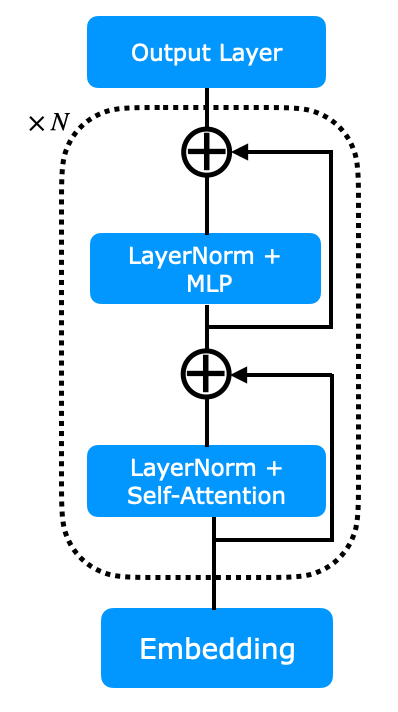

#### This is a great comparision of RNN's/CNN's and Transformers from : https://machinelearningmastery.com/the-transformer-model/

**"Comparison to Recurrent and Convolutional Layers**

Vaswani et al. (2017) explain that their motivation for abandoning the use of recurrence and convolutions was based on several factors:

1. Self-attention layers were found to be faster than recurrent layers for shorter sequence lengths and can be restricted to consider only a neighborhood in the input sequence for very long sequence lengths. 
2. The number of sequential operations required by a recurrent layer is based on the sequence length, whereas this number remains constant for a self-attention layer. 
3. In convolutional neural networks, the kernel width directly affects the long-term dependencies that can be established between pairs of input and output positions. Tracking long-term dependencies would require using large kernels or stacks of convolutional layers that could increase the computational cost."

# Part 3: Types of Transformer Architecture
<left>
1. <b>Encoder Only</b>: These models only have transformer architecture for the encoder and then a simple decoding layer. These models are conditioned on only the input and the output is therefore computed all at the same time. Tasks such as masked LM's use this type of architecture. An example of a large pretrain encoder only model is BERT.  
</left>
<center>
Example: Masked LM

Input: "I \<MASK> to the store." 

Output: "walked"
</center>
<left>
2. <b>Decoder Only</b>: These models only have transformer architecture for the decoder and use simple embedding as the input to the model. This type of model is used for traditional language modeling, where each token is predicted conditioned on only the previous tokens before. Generation is a task in which a decoder only model is used. An example of a large pretrain decoder only model is GPT2.  
</left>
<center>
Example: Generation

Input: "Write a sentence with the work 'red'".

Output: "The girl had red hair"
</center>
3. <b>Encoder-Decoder</b>: These models only have transformer architecture for both the encoder and decoder. This is useful when the tasks requires conditioning on the previous tokens AND the source sentence. Machine translation is a task which tends to use this type of architecture.An example of a large pretrain encoder-decoder model is T5.
<center>
Example: Machine Translation

Input: "Hola, como estas? "

Output: "Hi, how are you?"  
</center>

Nowadays, pretrained transformer models have a LOT of layers. 

<div>
<img src="https://jalammar.github.io/images/gpt2/gpt2-sizes-hyperparameters-3.png" width="350"/>
</div>
Photo Credit: https://jalammar.github.io/illustrated-gpt2/#part-1-got-and-language-modeling

![]()

# Part 4: Language Modeling with Transformers

We will aim to generate names based on particular language category using a character-level language model. 

We will do this by learning an autoregressive model $P(\text{name}| \text{category})$.

In PyTorch, a transformer block is defined via the `TransformerEncoderLayer` module. 


## Define a transformer module
Your task is to answer each of the questions with "TODO" below. 

Standard transformer models have a word embedding and a positional embedding. Since we have model with categories, 
we will add a category embedding as well. 
We simply add the different embeddings to get a unique representation of a token in its position. This works well enough because the embeddings are high dimensional and obviates the need for more sophisticated strategies such as concatenating the embeddings.

In [1]:
import math
import torch
from torch.nn import TransformerEncoderLayer
from torch.nn.functional import softmax, relu

class TransformerModel(torch.nn.Module):
    def __init__(self, vocab_size, num_languages=18, max_seq_len=25, input_dim=64, fc_hidden_dim=128,
                 num_attn_heads=2, num_layers=1
    ):
        super().__init__()
        self.vocab_size = vocab_size
        self.dims = input_dim
        self.position_tensor = torch.arange(max_seq_len, dtype=torch.long) # (0, 1, ..., max_seq_len - 1)

        # Initialize embeddings
        self.positional_embedding = torch.nn.Embedding(max_seq_len, input_dim)
        self.token_embedding = torch.nn.Embedding(vocab_size, input_dim)
        
        # Handle category inputs
        self.category_embedding = torch.nn.Embedding(num_languages, input_dim)
        
        # Initialize transformer layers
        self.transformer = torch.nn.ModuleList()
        for i in range(num_layers):
            self.transformer.append(
                TransformerEncoderLayer(input_dim, num_attn_heads, fc_hidden_dim, dropout=0,)
            )
        # Initialize final prediction layer
        self.hidden_to_pred = torch.nn.Linear(input_dim, vocab_size)

        # Initialize weights
        with torch.no_grad():
            for w in [self.positional_embedding.weight, self.token_embedding.weight, 
                      self.category_embedding.weight, self.hidden_to_pred.weight]:
                rand_tensor = torch.randn_like(w)
                w.copy_(rand_tensor)
  
    @staticmethod
    def prepare_mask(seq_len):
        # TODO: What does this code do? 
        mask = torch.triu(torch.ones(seq_len, seq_len))  # (seq_len, seq_len)
        mask.masked_fill_(mask == 0, float('-inf')).masked_fill_(mask == 1, float(0.0))
        mask = mask.transpose(0, 1)
        return mask

    def forward(self, inputs, category):
        # inputs: (seq_len, batch_size); dtype = long (representing token ids)
        # category: (batch_size, num_languages)
        seq_len = inputs.shape[0]
        
        # Prepare mask and positions
        mask = self.prepare_mask(seq_len)  # (seq_len, seq_len)
        position_tensor = self.position_tensor[:seq_len]  # (0, 1, ..., seq_len - 1)

        # Embedding
        # TODO: what does this line of code do?
        token_embedding = self.token_embedding(inputs) * math.sqrt(self.dims)  # (seq_len, batch_size, embed_dim)
        
        # TODO: what does this line of code do?
        pos_embedding = self.positional_embedding(position_tensor) # (seq_len, embed_dim)
        pos_embedding = pos_embedding[:, None, :]  # (seq_len, 1, embed_dim); broadcast across batch
        
        category_embedding = self.category_embedding(category)  # (batch_size, embed_dim)
        category_embedding = category_embedding[None, :, :]  # (1, batch_size, embed_dim); broadcast across seq_len
        
        # TODO: what does this line of code do?
        total_embedding = token_embedding + pos_embedding + category_embedding # (seq_len, batch_size, embed_dim)
        hidden = relu(total_embedding)  # (seq_len, batch_size, embed_dim)
        
        # Apply transformer layers
        for transformer_layer in self.transformer:
            hidden = transformer_layer(hidden, mask)  # (seq_len, batch_size, embed_dim)

        # Get the final scores
        outputs = self.hidden_to_pred(hidden)  # (seq_len, batch_size, vocab_size)
        return outputs 


### Data Preprocessing

Download the data from 
[this link](https://download.pytorch.org/tutorial/data.zip) 
and extract it to the current directory.
Look into the folder `data/names`, and make sure that 18 files such as `Arabic.txt`, `Chinese.txt`, etc. are available.


In [2]:
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1 # Plus EOS marker

# Turn a Unicode string to plain ASCII
def unicode_to_ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# Read a file and split into lines
def read_lines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicode_to_ascii(line) for line in lines]

# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in glob.glob('./data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = read_lines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)

print(n_letters)

# categories: 18 ['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish']
59


In [3]:
def input_to_indices(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(len(line))]
    return torch.LongTensor([letter_indexes]).T  # (seq_len, batch_size); batch_size = 1 

# LongTensor of second letter to end (EOS) for target
def target_to_indices(line):
    # Skip the first one and add EOS at the end
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor([letter_indexes]).T  # (seq_len, batch_size); batch_size = 1 


This is how we sample a single random example.

In [4]:
import numpy as np

# Make category, input, and target tensors from a random category, line pair
def sample_one_example():
    # sample category
    category = np.random.choice(all_categories)
    category_tensor = torch.LongTensor([all_categories.index(category)])
    # sample line from category
    line = np.random.choice(category_lines[category]) 
    input_line_tensor = input_to_indices(line)
    target_line_tensor = target_to_indices(line)
    return category_tensor, input_line_tensor, target_line_tensor

## Training loop
We are now ready to train the transformer model.

In [63]:
from torch.nn.functional import cross_entropy
import time
from tqdm.auto import tqdm

def train_sgd_one_pass(model, model2, total_num_examples, learning_rate, gamma):
    avg_loss = 0.0
    for i in tqdm(np.arange(total_num_examples)):  # ~2 min per epoch
        # sample a random training example
        category, input_line, target_line = sample_one_example()

        # Obtain predictions
        predictions = model(input_line, category)  # (seq_len, batch_size, vocab_size)
        
        # Compute the loss
        flattened_predictions = predictions.view(-1, predictions.shape[-1])  # (seq_len * batch_size, vocab_size)
        flattened_targets = target_line.view(-1)  # (seq_len * batch_size)
        loss = cross_entropy(flattened_predictions, flattened_targets)
        
        # Gradients and SGD update
        gradients = torch.autograd.grad(outputs=loss, inputs=model.parameters())
        
        # TODO: your code for the Gradients and SGD update
        with torch.no_grad():
            for param, grad in zip(model.parameters(), gradients):
                param -= learning_rate * grad
        
        with torch.no_grad():
            for p1, p2 in zip(model.parameters(), model2.parameters()):
                p2*= (1-gamma)
                p2+= gamma*p1
                
        avg_loss = i / (i+1) * avg_loss + loss.item() / (i+1)
        if i % 5000 == 0:
            print('\t\t', i, avg_loss)
    return avg_loss

In [6]:
total_num_examples = sum([len(category_lines[c]) for c in all_categories])
print(total_num_examples)

20074


In [7]:
n_letters

59

# Train
We are now ready to train the model. We will train it for 5 epochs through our data. 

In [8]:
model = TransformerModel(vocab_size=n_letters)
learning_rate = 1e-3# TODO: find the divergent learning rate to come up with a good initial learning rate

from copy import deepcopy
model_avg = deepcopy(model)

gamma = 1
start = time.time()

for epoch in range(10):
    t1 = time.time()
    print(f'Starting epoch {epoch}')
    avg_loss = train_sgd_one_pass(model, model_avg, total_num_examples, learning_rate, gamma)
    print(epoch+1, '\t', round(avg_loss, 3), 
          f'\t{round(time.time()-t1, 2)}sec')
    


Starting epoch 0


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 19.08827018737793
		 5000 3.165404649275184
		 10000 2.901505432722748
		 15000 2.792785144187594
		 20000 2.724686526005299
1 	 2.724 	32.37sec
Starting epoch 1


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 2.040469169616699
		 5000 2.5011043163614946
		 10000 2.4796717468827594
		 15000 2.468813586382843
		 20000 2.4579886162729525
2 	 2.458 	32.14sec
Starting epoch 2


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 2.282057285308838
		 5000 2.415701384354627
		 10000 2.403632323118051
		 15000 2.395958106562782
		 20000 2.3873071594092936
3 	 2.387 	32.43sec
Starting epoch 3


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 2.474020004272461
		 5000 2.351626896460124
		 10000 2.350581454951788
		 15000 2.3483883015720486
		 20000 2.340499703255072
4 	 2.34 	32.06sec
Starting epoch 4


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 1.734665870666504
		 5000 2.3041838857918266
		 10000 2.2930938864979438
		 15000 2.2885884955544062
		 20000 2.283624761808202
5 	 2.283 	31.76sec
Starting epoch 5


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 1.5750336647033691
		 5000 2.253256927619223
		 10000 2.2537667312010203
		 15000 2.2510407727111668
		 20000 2.244805637085286
6 	 2.245 	31.49sec
Starting epoch 6


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 2.5600333213806152
		 5000 2.2073624321899885
		 10000 2.2091079317990534
		 15000 2.2065970777797883
		 20000 2.20517880566673
7 	 2.205 	31.78sec
Starting epoch 7


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 1.9498307704925537
		 5000 2.181305389908691
		 10000 2.172073838275953
		 15000 2.1660086912227947
		 20000 2.1620663619522285
8 	 2.162 	32.77sec
Starting epoch 8


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 2.066075325012207
		 5000 2.137751622262934
		 10000 2.143576507311602
		 15000 2.140305524821702
		 20000 2.134767105474063
9 	 2.134 	32.46sec
Starting epoch 9


  0%|          | 0/20074 [00:00<?, ?it/s]

		 0 2.7405996322631836
		 5000 2.106149452146433
		 10000 2.1072284094382154
		 15000 2.106813770815898
		 20000 2.0999302779797904
10 	 2.1 	31.87sec


## Generating new names from the network

To sample we give the network a letter and ask what the next one is,
feed that in as the next letter, and repeat until the EOS token.

-  Create tensors for input category, starting letter, and empty hidden
   state
-  Create a string ``output_name`` with the starting letter
-  Up to a maximum output length,

   -  Feed the current letter to the network
   -  Get the next letter from highest output, and next hidden state
   -  If the letter is EOS, stop here
   -  If a regular letter, add to ``output_name`` and continue

-  Return the final name


In [9]:
max_length = 20

# Generate from a category and starting letter
@torch.no_grad()
def generate_name_greedy(category, start_letter):
    category_tensor = torch.LongTensor([all_categories.index(category)])

    output_name = start_letter
    for i in range(max_length):
        inp = input_to_indices(output_name)
        output = model(inp, category_tensor) # (seq_len, 1, n_letter)
        output = output[-1, 0, :]  # (n_letter,)
        _, next_letter = output.topk(1)
        next_letter = next_letter.item()
        if next_letter == n_letters - 1:  # EOS token
            break
        else:
            output_name += all_letters[next_letter]
        
    return output_name

In [10]:
# model(input_to_indices("j"), torch.LongTensor([all_categories.index("Czech")]))
generate_name_greedy("French", "h")

'huen'

In [11]:
print(all_categories)

['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish']


In [12]:
generate_name_greedy('French', start_letter='J')

'Jenen'

We can also sample from the network for names.

In [13]:
from torch.nn.functional import softmax

# Generate from a category and starting letter
@torch.no_grad()
def generate_name_sample(category, start_letter, temperature=1):
    category_tensor = torch.LongTensor([all_categories.index(category)])
    output_name = start_letter
    for i in range(max_length):
        inp = input_to_indices(output_name)
        output = model(inp, category_tensor)  # (seq_len, 1, n_letter)
        output = output[-1, 0, :]  # (n_letter,)
        probabilities = softmax(output / temperature, dim=0)
        next_letter = torch.multinomial(probabilities, 1)[0].item()
        if next_letter == n_letters - 1:  # EOS token
            break
        else:
            letter = all_letters[next_letter]
            output_name += letter
        
    return output_name

In [14]:
print(all_categories)

['Czech', 'German', 'Arabic', 'Japanese', 'Chinese', 'Vietnamese', 'Russian', 'French', 'Irish', 'English', 'Spanish', 'Greek', 'Italian', 'Portuguese', 'Scottish', 'Dutch', 'Korean', 'Polish']


In [62]:
for i in range(10):
    print(generate_name_sample('Japanese', start_letter='H'))

Hantade
Hapszal
Hinelo
Hojendos
Hi,den
Hoaciohis
Holi
Haing
Hi
Hiramer


In [16]:
generate_name_sample('Chinese', start_letter='Z')

'Zenoz'

# Part 5: Different Positional Encoding
Just like word embeddings, positional embeddings can be calculated in many different ways. 
In the original model, we used the same embedding structure as the word embeddings (see more info [here](https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html#torch.nn.Embedding)), but now lets try a different positional encodings. 

<div>
<img src="https://machinelearningmastery.com/wp-content/uploads/2022/01/PE1.png" width="350"/>
</div>
Photo Credit: https://machinelearningmastery.com/a-gentle-introduction-to-positional-encoding-in-transformer-models-part-1/g

The math/code below outlines a positional encoding that uses sin and cos functions. 

## Sin/Cosine Positional Encoding
This is a $d$-dimentional vector for encoding the positional relationship of an input. Let $t$ be the desired position and $p_t \in \mathbb{R}^d$ by the corresponding encoding. We produce the vector $p_t$ using the following:
$$
\begin{equation}
p_t^{(i)}
    \begin{cases}
        \sin(w_k \cdot t) & \text{if } i = 2k\\
        \cos(w_k \cdot t) & \text{if } i = 2k +1
    \end{cases}
\end{equation}
$$
where $w_k = \frac{1}{10000^{2k/d}}$. 

As you can see this will correspond the the following vector,
$$
\begin{bmatrix}
\sin(w_1 \cdot t)\\
\cos(w_1 \cdot t)\\
\sin(w_1 \cdot t)\\
\cos(w_1 \cdot t)\\
...\\
\sin(w_1 \cdot t)\\
\cos(w_1 \cdot t)\\
\end{bmatrix}
$$

This provides an elevated binary format for positional encoding. See [here](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/) for more explanation. 

Text(0.5, 1.0, 'Sine Positional Embedding')

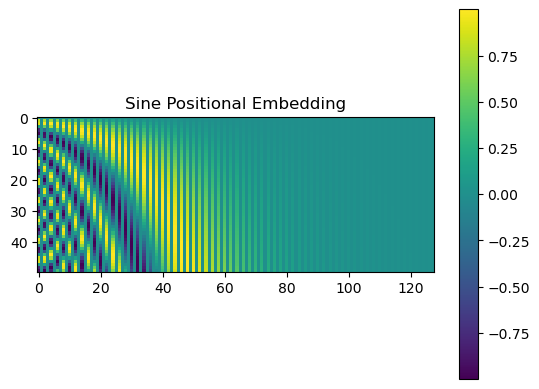

In [17]:
# Sine Positional Embeddings
max_len = 50
dimension = 128
position = torch.arange(max_len).unsqueeze(1)
div_term = torch.exp(torch.arange(0, dimension, 2) * (-math.log(10000.0) / dimension))
pe = torch.zeros(max_len, 1, dimension)
pe[:, 0, 0::2] = torch.sin(position * div_term)

# Graph of Sine Positional Embeddings
data = pe.squeeze(1)
import matplotlib.pyplot as plt

plt.imshow(data)
plt.colorbar()
plt.title("Sine Positional Embedding")

Text(0.5, 1.0, 'Cosine Positional Embedding')

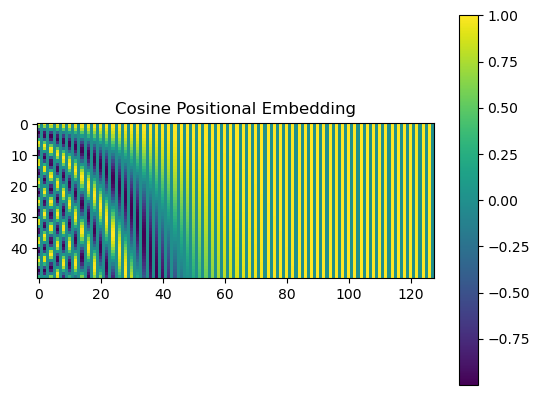

In [18]:
# Cosine Positional Embeddings
max_len = 50
dimension = 128
position = torch.arange(max_len).unsqueeze(1)
div_term = torch.exp(torch.arange(0, dimension, 2) * (-math.log(10000.0) / dimension))
pe = torch.zeros(max_len, 1, dimension)
pe[:, 0, 0::2] = torch.cos(position * div_term)

# Graph of Cosine Positional Embeddings
data = pe.squeeze(1)
import matplotlib.pyplot as plt
plt.imshow(data)
plt.colorbar()
plt.title("Cosine Positional Embedding")

Text(0.5, 1.0, 'Random Initialized Embedding')

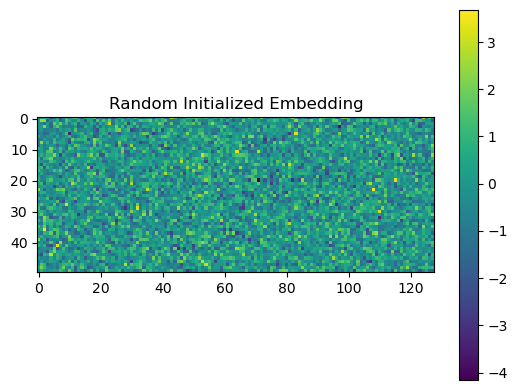

In [19]:
# Graph of Random Intialized Positional Embeddings
position_tensor = torch.arange(50, dtype=torch.long) # (0, 1, ..., max_seq_len - 1)

# Initialize embeddings
positional_embedding = torch.nn.Embedding(50, 128)
pos = positional_embedding(position_tensor)

data = pos.detach().numpy()
import matplotlib.pyplot as plt
plt.imshow(data)
plt.colorbar()
plt.title("Random Initialized Embedding")

## Transformers with Sin/Cos Positional Encoding
Use the "PositionalEncoding_SinCos" module below to retrain the transformer model we created in Part 4. 

In [21]:
class PositionalEncoding_SinCos(torch.nn.Module):

    def __init__(self, d_model: int, dropout: float = 0.1, max_len: int = 5000):
        super().__init__()
        self.dropout = torch.nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        pe = torch.zeros(max_len, 1, d_model)
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        x = x + self.pe[:x.size(0)]
        return self.dropout(x)

# Bonus 1: Preform averaged SGD using transformer architecture
Using the exact transformer model from Part 4 ("TransformerModel"), we will implement averaged SGD with an exponentially moving average. 
In addition to the model parameters $w_t$, we 
also maintain a separate set of parameters $\bar w_t$ to serve as an average. The updates of averaged SGD are
$$
    w_{t+1} = w_t - \eta g_t \\
    \bar w_{t+1} = (1 - \gamma) \bar w_t + \gamma w_{t+1},
$$
where $\eta$ is a learning rate, $g_t$ is a stochastic gradient at $w_t$ and $\gamma \in (0, 1)$ is an average weight. 

Some notes:
- the update of $w_t$ is identical to the regular SGD method. That is, the averaged parameter $\bar w_t$ is *not* used during the stochastic gradient updates. 
- The averaged parameter $\bar w_t$ is updated on the side and never to be used in model updates. We use $\bar w_t$ for logging only. 

Your task is to train the model for $10$ epochs and plot the train/test loss for both the unaveraged model $w_t$ as well as the averaged_model $\bar w_t$ in the same plot. You can use the function "compute_logs" below to calculate the loss. Use a learning_rate = 0.05 and do full SGD (not minibatch). We will use the average weight as $\gamma = 10^{-3}$.


**NOTE**: Do not include the logs of the first two passes through the data in the plot. This is because the inital loss is always very large and this tends to drown out the more interesting patterns we observe later on during training. 
 
    


In [22]:
def compute_loss(net):
    # Compute the loss
    category, input_line, target_line = sample_one_example()
    predictions = net(input_line, category)  # (seq_len, batch_size, vocab_size)
    flattened_predictions = predictions.view(-1, predictions.shape[-1])  # (seq_len * batch_size, vocab_size)
    flattened_targets = target_line.view(-1)  # (seq_len * batch_size)
    loss = cross_entropy(flattened_predictions, flattened_targets)
    return loss
    
def compute_logs(net, verbose=False):
    train_loss = compute_loss(net)
    test_loss = compute_loss(net)
    if verbose:
        print(('Train Loss = {:.3f}, ' + 
               'Test Loss = {:.3f},').format(
                train_loss.item(), 
                test_loss.item())
    )
    return (train_loss.item(), test_loss.item())

# Bonus 2: Find divergent learning rate for this RNN model below. 
You do NOT need to know or understand RNN's for this problem, but if you are interested please check out the *optional* demo on Canvas on RNN's. In this exercise, we are just asking that you find the divergent learning rate for this model. The code created for you below, you will only need to use the code in the labeled code chunk to find the divergent learning rate and then use that learning rate to train the  model. No graphs are needed at the end. 


In [ ]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(letterToTensor('J'))

print(lineToTensor('Jones').size())

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0.]])
torch.Size([5, 1, 59])


In [51]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [52]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i



In [53]:
import random
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Irish / line = Milligan
category = German / line = Wernher
category = Chinese / line = Mar
category = Spanish / line = Pavia
category = French / line = D'aramitz
category = Dutch / line = Roijacker
category = Korean / line = Hong
category = Irish / line = O'Mahony
category = Portuguese / line = Serafim
category = Polish / line = Rog


# Use this code to find divergent learning rate!

In [65]:
criterion = nn.NLLLoss()
rnn = RNN(n_letters, n_hidden, n_categories)

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()
learning_rate = #TODO: Find the learning rate
for iter in range(1, 20):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    print(f"Iteration {iter}: {loss}")


Iteration 1: 2.94917631149292
Iteration 2: 2.9340431690216064
Iteration 3: 2.9499709606170654
Iteration 4: 2.864987373352051
Iteration 5: 2.8192920684814453
Iteration 6: 2.8703575134277344
Iteration 7: 2.9421937465667725
Iteration 8: 2.8814003467559814
Iteration 9: 2.9075849056243896
Iteration 10: 2.878587007522583
Iteration 11: 2.765007495880127
Iteration 12: 2.820157766342163
Iteration 13: 2.864448070526123
Iteration 14: 2.9992785453796387
Iteration 15: 2.9495956897735596
Iteration 16: 2.873821258544922
Iteration 17: 2.9307148456573486
Iteration 18: 2.893972396850586
Iteration 19: 2.8940649032592773


In [55]:
import time
import math
rnn = RNN(n_letters, n_hidden, n_categories)
learning_rate = #TODO
n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print iter number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 3s) 2.4678 Ryu / Chinese ✗ (Korean)
10000 10% (0m 7s) 1.0203 Than / Vietnamese ✓
15000 15% (0m 10s) 0.9531 Ying / Chinese ✓
20000 20% (0m 14s) 4.0641 Masin / Arabic ✗ (Italian)
25000 25% (0m 17s) 2.7686 Shichirobei / Polish ✗ (Japanese)
30000 30% (0m 21s) 1.8796 Abreu / Portuguese ✗ (Spanish)
35000 35% (0m 24s) 3.2545 Linart / French ✗ (Czech)
40000 40% (0m 28s) 1.0489 Archambault / French ✓
45000 45% (0m 31s) 1.0654 Yamana / Japanese ✓
50000 50% (0m 35s) 0.4562 Dam / Vietnamese ✓
55000 55% (0m 38s) 0.1727 Zhavoronsky / Russian ✓
60000 60% (0m 42s) 0.4612 Dobrajansky / Russian ✓
65000 65% (0m 46s) 0.8439 Semick / Czech ✓
70000 70% (0m 50s) 1.6307 Kruckel / Czech ✗ (German)
75000 75% (0m 54s) 1.0621 Ventimiglia / Italian ✓
80000 80% (0m 57s) 0.5996 Polites / Greek ✓
85000 85% (1m 1s) 3.1731 Schultze / Scottish ✗ (German)
90000 90% (1m 5s) 2.1488 Acquafredda / Portuguese ✗ (Italian)
95000 95% (1m 9s) 1.2123 Huie / Chinese ✓
100000 100% (1m 13s) 0.0330 Fotopoulos / Greek ✓
